<a href="https://colab.research.google.com/github/devmustafa4/Covid-19-Data-Analysis/blob/main/Covid-19-DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary files


In [3]:
import numpy as np 
import pandas as pd 
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from pandas import read_csv

# Mounting the drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


#  Loading the data


In [5]:
data = read_csv('drive/MyDrive/LearnOClock/covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Cleaning the data


In [6]:
data.isnull().any(axis=0)

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [7]:
# removing rows with null values
data.dropna(inplace=True)
data.isnull().any(axis=0)

SNo                False
ObservationDate    False
Province/State     False
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [8]:
# removing rows with negative confirmed cases
data = data[~(data['Confirmed'] <  0)]

# removing rows with negative deaths cases
data = data[~(data['Deaths'] <  0)]

# removing rows with negative confirmed cases
data = data[~(data['Recovered'] <  0)]



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228325 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              228325 non-null  int64  
 1   ObservationDate  228325 non-null  object 
 2   Province/State   228325 non-null  object 
 3   Country/Region   228325 non-null  object 
 4   Last Update      228325 non-null  object 
 5   Confirmed        228325 non-null  float64
 6   Deaths           228325 non-null  float64
 7   Recovered        228325 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.7+ MB


In [10]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,228325.000000,2.283250e+05,228325.000000,2.283250e+05
mean,158731.081178,8.021549e+04,1961.381106,4.184746e+04
std,85864.069975,2.493653e+05,5871.948609,1.793576e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,85428.000000,1.225000e+03,15.000000,0.000000e+00
50%,159306.000000,1.175800e+04,234.000000,1.211000e+03
75%,232836.000000,4.841200e+04,1411.000000,1.660300e+04
max,306429.000000,5.713215e+06,112385.000000,6.399531e+06


# Tasks

## Task1: Rank the countries in the dataset in descending order according to the number of deaths.

In [11]:
data = data.sort_values(by="Deaths", ascending=False)
data["RankByDeath"] = data["Deaths"].rank(method="min")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,RankByDeath
305972,305973,05/29/2021,England,UK,2021-05-30 04:20:55,3910803.0,112385.0,0.0,228325.0
305207,305208,05/28/2021,England,UK,2021-05-29 04:20:41,3908214.0,112379.0,0.0,228324.0
304442,304443,05/27/2021,England,UK,2021-05-28 04:20:36,3904934.0,112371.0,0.0,228323.0
303677,303678,05/26/2021,England,UK,2021-05-27 04:20:59,3902160.0,112363.0,0.0,228322.0
302912,302913,05/25/2021,England,UK,2021-05-26 04:20:35,3899813.0,112355.0,0.0,228321.0
...,...,...,...,...,...,...,...,...,...
67470,67471,07/18/2020,Okayama,Japan,2021-04-02 15:13:53,37.0,0.0,28.0,1.0
196739,196740,01/06/2021,Macau,Macau,2021-04-02 15:13:53,46.0,0.0,46.0,1.0
67499,67500,07/18/2020,Prince Edward Island,Canada,2021-04-02 15:13:53,36.0,0.0,29.0,1.0
196737,196738,01/06/2021,Luxembourg,Belgium,2021-04-02 15:13:53,18618.0,0.0,0.0,1.0


## Task 2: Figure out the most affected provinces/states in the top 3 countries with the most number of Deaths.

In [12]:
countries_by_deaths  = pd.DataFrame(data.groupby(['Province/State','Country/Region']).sum()['Deaths'])
countries_by_deaths = countries_by_deaths.sort_values(by="Deaths", ascending=False)
most_affected_countries_deaths = pd.DataFrame(countries_by_deaths.iloc[:3])
most_affected_countries_deaths

,,Deaths
Province/State,Country/Region,
England,UK,24042130.0
Sao Paulo,Brazil,17339593.0
New York,US,15531696.0


## Task 3: Repeat the first two steps for Recovered and Confirmed cases as well.


### For Confirmed Cases

#### Ranking

In [13]:
data = data.sort_values(by="Confirmed", ascending=False)
data["RankByConfirmed"] = data["Confirmed"].rank(method="min")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,RankByDeath,RankByConfirmed
306127,306128,05/29/2021,Maharashtra,India,2021-05-30 04:20:55,5713215.0,94030.0,5339838.0,228176.0,228325.0
305362,305363,05/28/2021,Maharashtra,India,2021-05-29 04:20:41,5692920.0,93198.0,5307874.0,228172.0,228324.0
304597,304598,05/27/2021,Maharashtra,India,2021-05-28 04:20:36,5672180.0,92225.0,5276203.0,228167.0,228323.0
303832,303833,05/26/2021,Maharashtra,India,2021-05-27 04:20:59,5650907.0,91341.0,5241833.0,228164.0,228322.0
303067,303068,05/25/2021,Maharashtra,India,2021-05-26 04:20:35,5626155.0,90349.0,5218768.0,228160.0,228321.0
...,...,...,...,...,...,...,...,...,...,...
184014,184015,12/20/2020,Unknown,Mexico,2021-04-02 15:13:53,0.0,0.0,978002.0,1.0,1.0
245929,245930,03/11/2021,Unknown,Colombia,2021-04-02 15:13:53,0.0,0.0,0.0,1.0,1.0
190878,190879,12/29/2020,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0,1.0,1.0
245931,245932,03/11/2021,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0,1.0,1.0


#### Most Affected Province with most number of Confirmed Cases


In [14]:
countries_by_confirmed  = pd.DataFrame(data.groupby(['Province/State','Country/Region']).sum()['Confirmed'])
countries_by_confirmed = countries_by_confirmed.sort_values(by="Confirmed", ascending=False)
most_affected_countries_confirmed = pd.DataFrame(countries_by_confirmed.iloc[:3])
most_affected_countries_confirmed

,,Confirmed
Province/State,Country/Region,
California,US,696898013.0
Maharashtra,India,681186928.0
England,UK,666227518.0


### For Recovered Cases

#### Ranking

In [15]:
data = data.sort_values(by="Recovered", ascending=False)
data["RankByRecovered"] = data["Recovered"].rank(method="min")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,RankByDeath,RankByConfirmed,RankByRecovered
179328,179329,12/14/2020,Recovered,US,2021-04-02 15:13:53,0.0,0.0,6399531.0,1.0,1.0,228325.0
178565,178566,12/13/2020,Recovered,US,2021-04-02 15:13:53,0.0,0.0,6298082.0,1.0,1.0,228324.0
177802,177803,12/12/2020,Recovered,US,2021-04-02 15:13:53,0.0,0.0,6246605.0,1.0,1.0,228323.0
177039,177040,12/11/2020,Recovered,US,2021-04-02 15:13:53,0.0,0.0,6135314.0,1.0,1.0,228322.0
176276,176277,12/10/2020,Recovered,US,2021-04-02 15:13:53,0.0,0.0,5985047.0,1.0,1.0,228321.0
...,...,...,...,...,...,...,...,...,...,...,...
106046,106047,09/08/2020,Florida,US,2021-04-02 15:13:53,650092.0,11915.0,0.0,220581.0,222692.0,1.0
191500,191501,12/30/2020,Ostergotland,Sweden,2021-04-02 15:13:53,13869.0,360.0,0.0,126817.0,119853.0,1.0
137593,137594,10/20/2020,Moquegua,Peru,2021-04-02 15:13:53,13870.0,275.0,0.0,118675.0,119866.0,1.0
273515,273516,04/16/2021,Wisconsin,US,2021-04-17 04:20:40,650081.0,7412.0,0.0,213585.0,222691.0,1.0


#### Most Affected Province with most number of Recovered Cases


In [16]:
countries_by_recovered  = pd.DataFrame(data.groupby(['Province/State','Country/Region']).sum()['Recovered'])
countries_by_recovered = countries_by_recovered.sort_values(by="Recovered", ascending=False)
most_affected_countries_recovered = pd.DataFrame(countries_by_recovered.iloc[:3])
most_affected_countries_recovered

,,Recovered
Province/State,Country/Region,
Maharashtra,India,597480809.0
Recovered,US,503370163.0
Sao Paulo,Brazil,444187689.0


## Task 4: Plot a bar graph for the top 10 states in China and US in accordance with the death cases, and recovered cases.


    Province/State  Country/Region     Deaths
12          Hubei  Mainland China  2032612.0
11          Henan  Mainland China    10360.0
10   Heilongjiang  Mainland China     6174.0
1         Beijing  Mainland China     4137.0
5       Guangdong  Mainland China     3721.0
22       Shandong  Mainland China     3245.0
23       Shanghai  Mainland China     3125.0
9           Hebei  Mainland China     2972.0
2       Chongqing  Mainland China     2849.0
0           Anhui  Mainland China     2843.0

     Province/State Country/Region      Deaths
109       New York             US  15531696.0
14      California             US  10831870.0
168          Texas             US   9517809.0
107     New Jersey             US   7323817.0
44         Florida             US   7261979.0
65        Illinois             US   5589797.0
124   Pennsylvania             US   5520992.0
93   Massachusetts             US   4628938.0
94        Michigan             US   4365856.0
49         Georgia             US   39773

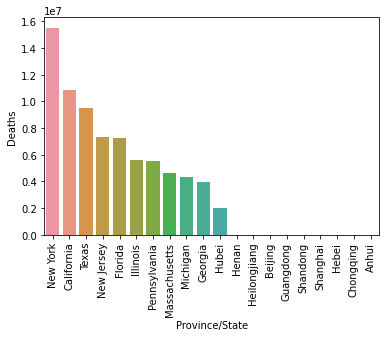

In [17]:
## Death Plot

china = pd.DataFrame(data.loc[data['Country/Region'].isin(['China', 'Mainland China'])])
p_china = pd.DataFrame(china.groupby(['Province/State','Country/Region']).sum()['Deaths'])
p_china.reset_index(inplace=True)
cases_china = p_china.sort_values(by='Deaths', ascending=False).head(10)
print("\n",cases_china)

us = pd.DataFrame(data.loc[data['Country/Region'].isin(['US'])])
p_us = pd.DataFrame(us.groupby(['Province/State','Country/Region']).sum()['Deaths'])
p_us.reset_index(inplace=True)
cases_us = p_us.sort_values(by='Deaths', ascending=False).head(10)
print("\n",cases_us)

cases = cases_us.append(cases_china)

print("\n",cases)
sns.barplot(x= cases['Province/State'] ,y= cases.Deaths, data=pd.melt(cases))
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(15, 4)})
plt.show()


    Province/State  Country/Region   Recovered
12          Hubei  Mainland China  28859431.0
5       Guangdong  Mainland China    850792.0
32       Zhejiang  Mainland China    594885.0
11          Henan  Mainland China    588730.0
23       Shanghai  Mainland China    510078.0
13          Hunan  Mainland China    475041.0
10   Heilongjiang  Mainland China    471978.0
0           Anhui  Mainland China    457643.0
16        Jiangxi  Mainland China    433485.0
1         Beijing  Mainland China    380764.0

            Province/State Country/Region    Recovered
136             Recovered             US  503370163.0
172                    US             US        532.0
21            Chicago, IL             US         44.0
14             California             US         40.0
153           Seattle, WA             US         22.0
144  San Diego County, CA             US         18.0
29        Cook County, IL             US         16.0
65               Illinois             US         16.0
148 

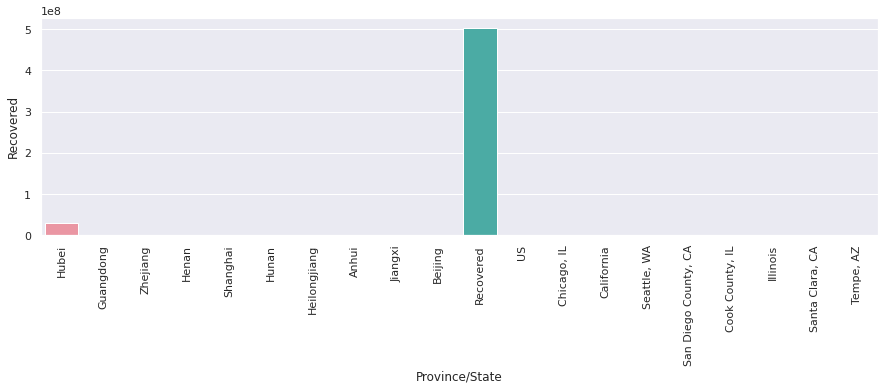

In [18]:
## Recovered Plot

china_r = pd.DataFrame(data.loc[data['Country/Region'].isin(['China', 'Mainland China'])])
p_china_r = pd.DataFrame(china_r.groupby(['Province/State','Country/Region']).sum()['Recovered'])
p_china_r.reset_index(inplace=True)
cases_china_r = p_china_r.sort_values(by='Recovered', ascending=False).head(10)
print("\n",cases_china_r)

us_r = pd.DataFrame(data.loc[data['Country/Region'].isin(['US'])])
p_us_r = pd.DataFrame(us.groupby(['Province/State','Country/Region']).sum()['Recovered'])
p_us_r.reset_index(inplace=True)
cases_us_r = p_us_r.sort_values(by='Recovered', ascending=False).head(10)
print("\n",cases_us_r)

cases_r = cases_china_r.append(cases_us_r)

print("\n",cases_r)
sns.barplot(x= cases_r['Province/State'] ,y= cases_r.Recovered, data=pd.melt(cases_r))
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(20, 4)})
plt.show()

## Task 5: Plot the confirmed, deaths and recovered cases as line graphs with dates for the US, Iran, and China each.


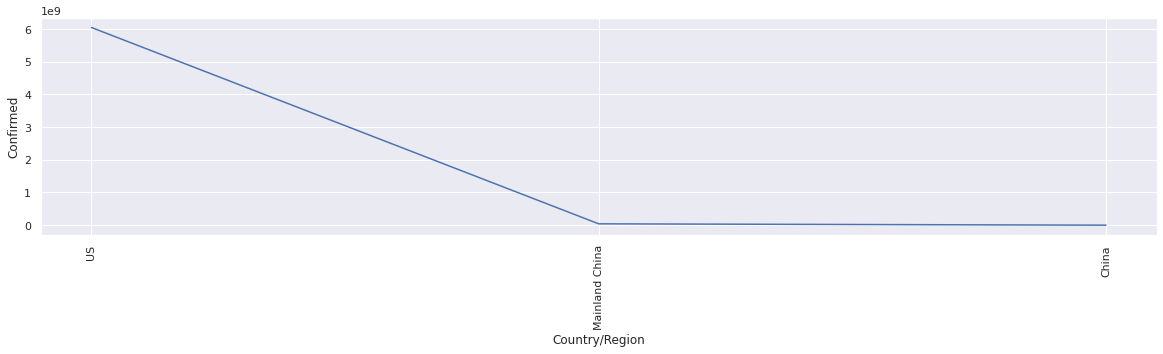

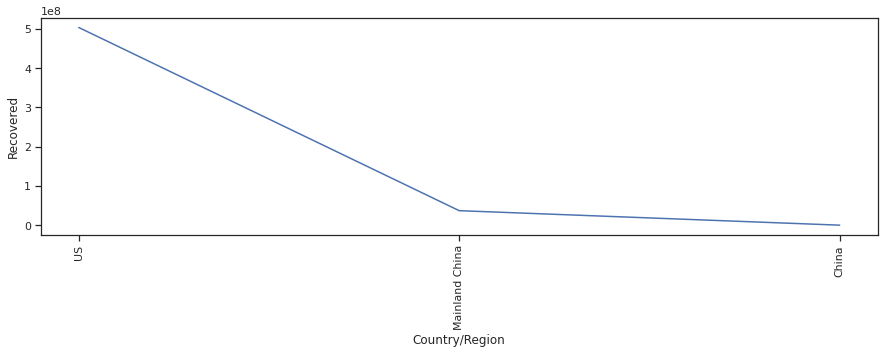

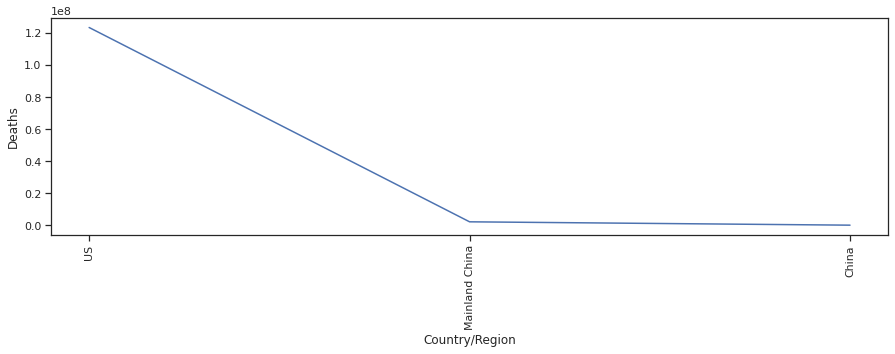

In [19]:
countries_of_interest = ["US", "China", "Mainland China", "Iran"]

countries = pd.DataFrame(data.loc[data['Country/Region'].isin(countries_of_interest)])
countries = pd.DataFrame(countries.groupby(['Province/State','Country/Region']).sum())

p_confirmed = pd.DataFrame(countries.groupby(['Country/Region']).sum()['Confirmed'])
p_confirmed.reset_index(inplace=True)
cases_confirmed = p_confirmed.sort_values(by='Confirmed', ascending=False).head(25)

sns.lineplot(x= cases_confirmed['Country/Region'] ,y= cases_confirmed.Confirmed, data=pd.melt(cases_confirmed), palette="dark:salmon_r")
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(15, 4)})
sns.set_theme(style='ticks')
plt.show()

p_recovered = pd.DataFrame(countries.groupby(['Country/Region']).sum()['Recovered'])
p_recovered.reset_index(inplace=True)
cases_recovered = p_recovered.sort_values(by='Recovered', ascending=False).head(25)

sns.lineplot(x= cases_recovered['Country/Region'] ,y= cases_recovered.Recovered, data=pd.melt(cases_recovered), palette="dark:salmon_r")
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(15, 4)})
sns.set_theme(style='ticks')
plt.show()

p_death = pd.DataFrame(countries.groupby(['Country/Region']).sum()['Deaths'])
p_death.reset_index(inplace=True)
cases = p_death.sort_values(by='Deaths', ascending=False).head(25)

sns.lineplot(x= cases['Country/Region'] ,y= cases.Deaths, data=pd.melt(cases), palette="dark:salmon_r")
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(15, 4)})
sns.set_theme(style='ticks')
plt.show()


## Task 6: Looking at the plots, explain which country has seen a surge in confirmed, and death cases?

According to the graphs US has seen surge in the confirmed and death cases

## Task 7: Work out the death rate due to COVID-19 in these three countries.

In [20]:
countries = pd.DataFrame(data.loc[data['Country/Region'].isin(countries_of_interest)])

countries['Deaths'] = countries['Deaths'].astype('int64')

rec = pd.DataFrame(countries[['Deaths']].value_counts(normalize=True)*100)
rec.reset_index(inplace=True)
rec.rename(columns = {0:'Rate'}, inplace=True)

rec['Country/Region'] = countries['Country/Region'].copy()

rec = rec.groupby('Country/Region').sum()
rec.reset_index(inplace=True)
rec[['Deaths']].value_counts(normalize=True)*100

rec['Country/Region'] = rec['Country/Region'].astype('str')

rec

,Country/Region,Deaths,Rate
0,China,166858,0.571147
1,Mainland China,14110415,66.716025
2,US,22214953,7.528322


## Task 8: By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran, and China) and then answer the question?

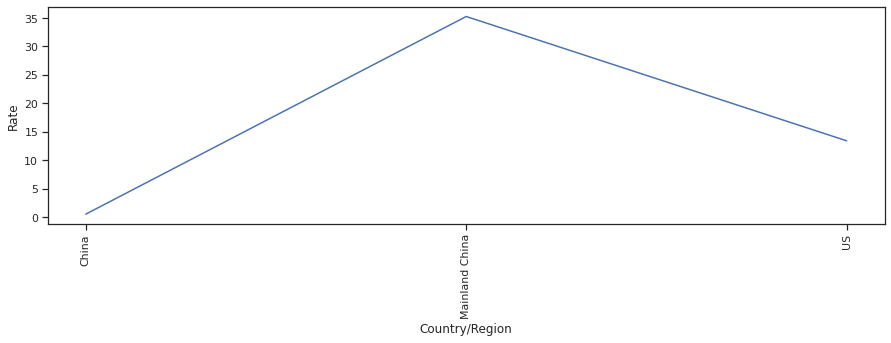

In [21]:
countries = pd.DataFrame(data.loc[data['Country/Region'].isin(countries_of_interest)])

countries['Confirmed'] = countries['Confirmed'].astype('int64')
countries['Recovered'] = countries['Recovered'].astype('int64')

rec = pd.DataFrame(countries[['Recovered', 'Confirmed']].value_counts(normalize=True)*100)
rec.reset_index(inplace=True)
rec.rename(columns = {0:'Rate'}, inplace=True)

rec['Country/Region'] = countries['Country/Region'].copy()

rec = rec.groupby('Country/Region').sum()
rec.reset_index(inplace=True)
rec[['Recovered', 'Confirmed']].value_counts(normalize=True)*100

rec['Country/Region'] = rec['Country/Region'].astype('str')

sns.lineplot(x= rec['Country/Region'], y= rec.Rate, data=rec)
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.show()

From Graph it is evident that China has highest recovery rate. 